In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import mofax as mfx

rcParams['figure.dpi'] = 200

In [2]:
m = mfx.mofa_model("model/mofa.hdf5")

In [3]:
print(f"""\
Cells: {m.shape[0]}
Features: {m.shape[1]}
Groups of cells: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Cells: 5183
Features: 24794
Groups of cells: GO_HPO-View
Views: GO_BP, GO_CC, GO_MF, HPO



In [4]:
# HDF5 group
print("HDF5 group:\n", m.weights)

# np.ndarray
print("\nnp.ndarray:\n", m.get_weights()[:3,:5])

# pd.DataFrame
print("\npd.DataFrame:\n", m.get_weights(df=True).iloc[:3,:5])

HDF5 group:
 <HDF5 group "/expectations/W" (4 members)>

np.ndarray:
 [[-7.64154091e-05  3.18552773e-05  1.36765362e-05 -3.73877100e-05
   1.65415216e-06]
 [-5.88720506e-05 -6.82856719e-05 -1.88420001e-04 -5.38855139e-07
  -2.04296094e-05]
 [-4.45342493e-05  9.61783006e-05 -3.25359640e-04 -1.83854990e-04
  -5.39302102e-05]]

pd.DataFrame:
                  Factor1   Factor2   Factor3       Factor4   Factor5
feature0_view0 -0.000076  0.000032  0.000014 -3.738771e-05  0.000002
feature1_view0 -0.000059 -0.000068 -0.000188 -5.388551e-07 -0.000020
feature2_view0 -0.000045  0.000096 -0.000325 -1.838550e-04 -0.000054


C:\Users\Filippo Corti\Documents\GitHub\ExplainableClustering\.venv\Lib\site-packages\mofax\plot_weights.py:134: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna({"to_label": False})


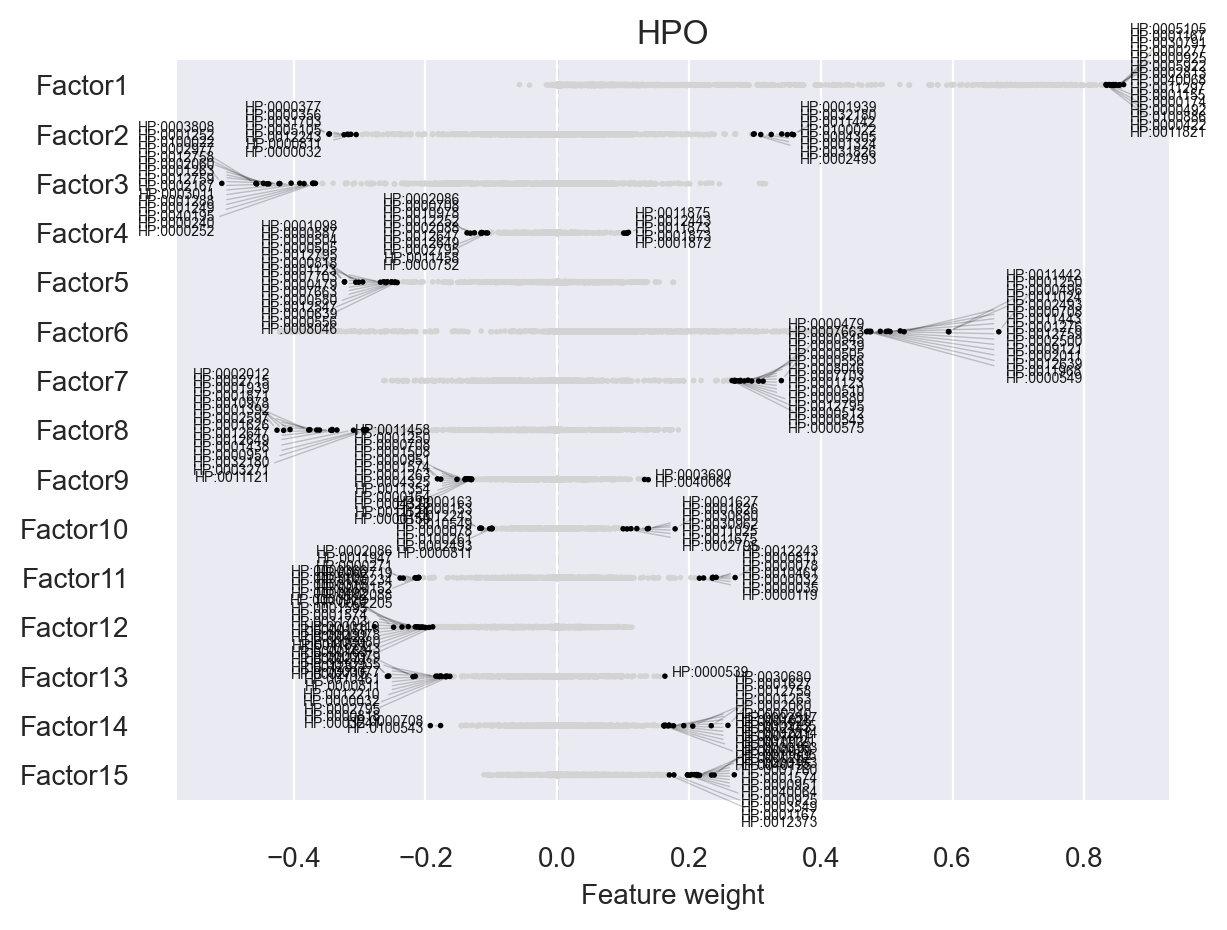

In [4]:
ax = mfx.plot_weights(m, views=["HPO"], n_features=15)

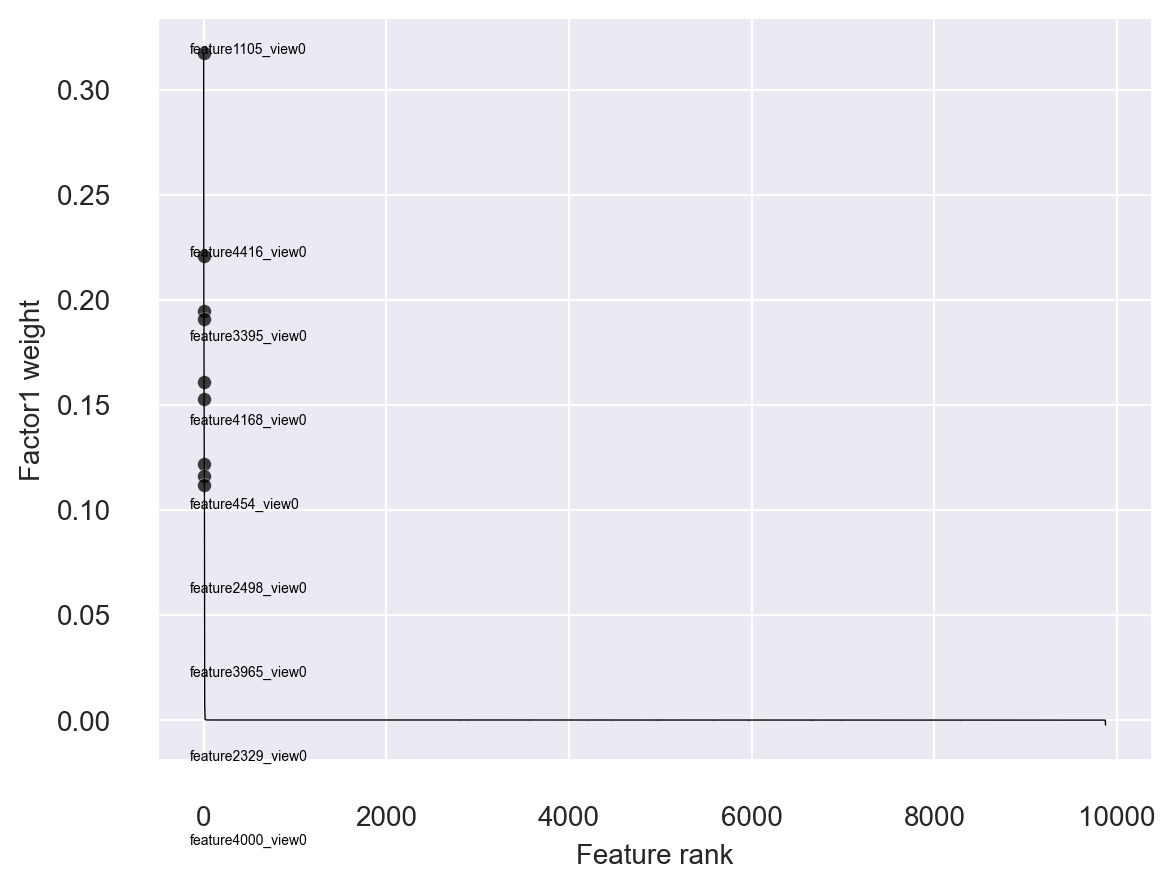

In [6]:
ax = mfx.plot_weights_ranked(m, factor=0, n_features=10,
                             y_repel_coef=0.04, x_rank_offset=-150)
# repel coefficient and offsets can be useful to move labels around
# and there are x_rank_offset and x_rank_offset_neg for positive and negative weights respectively

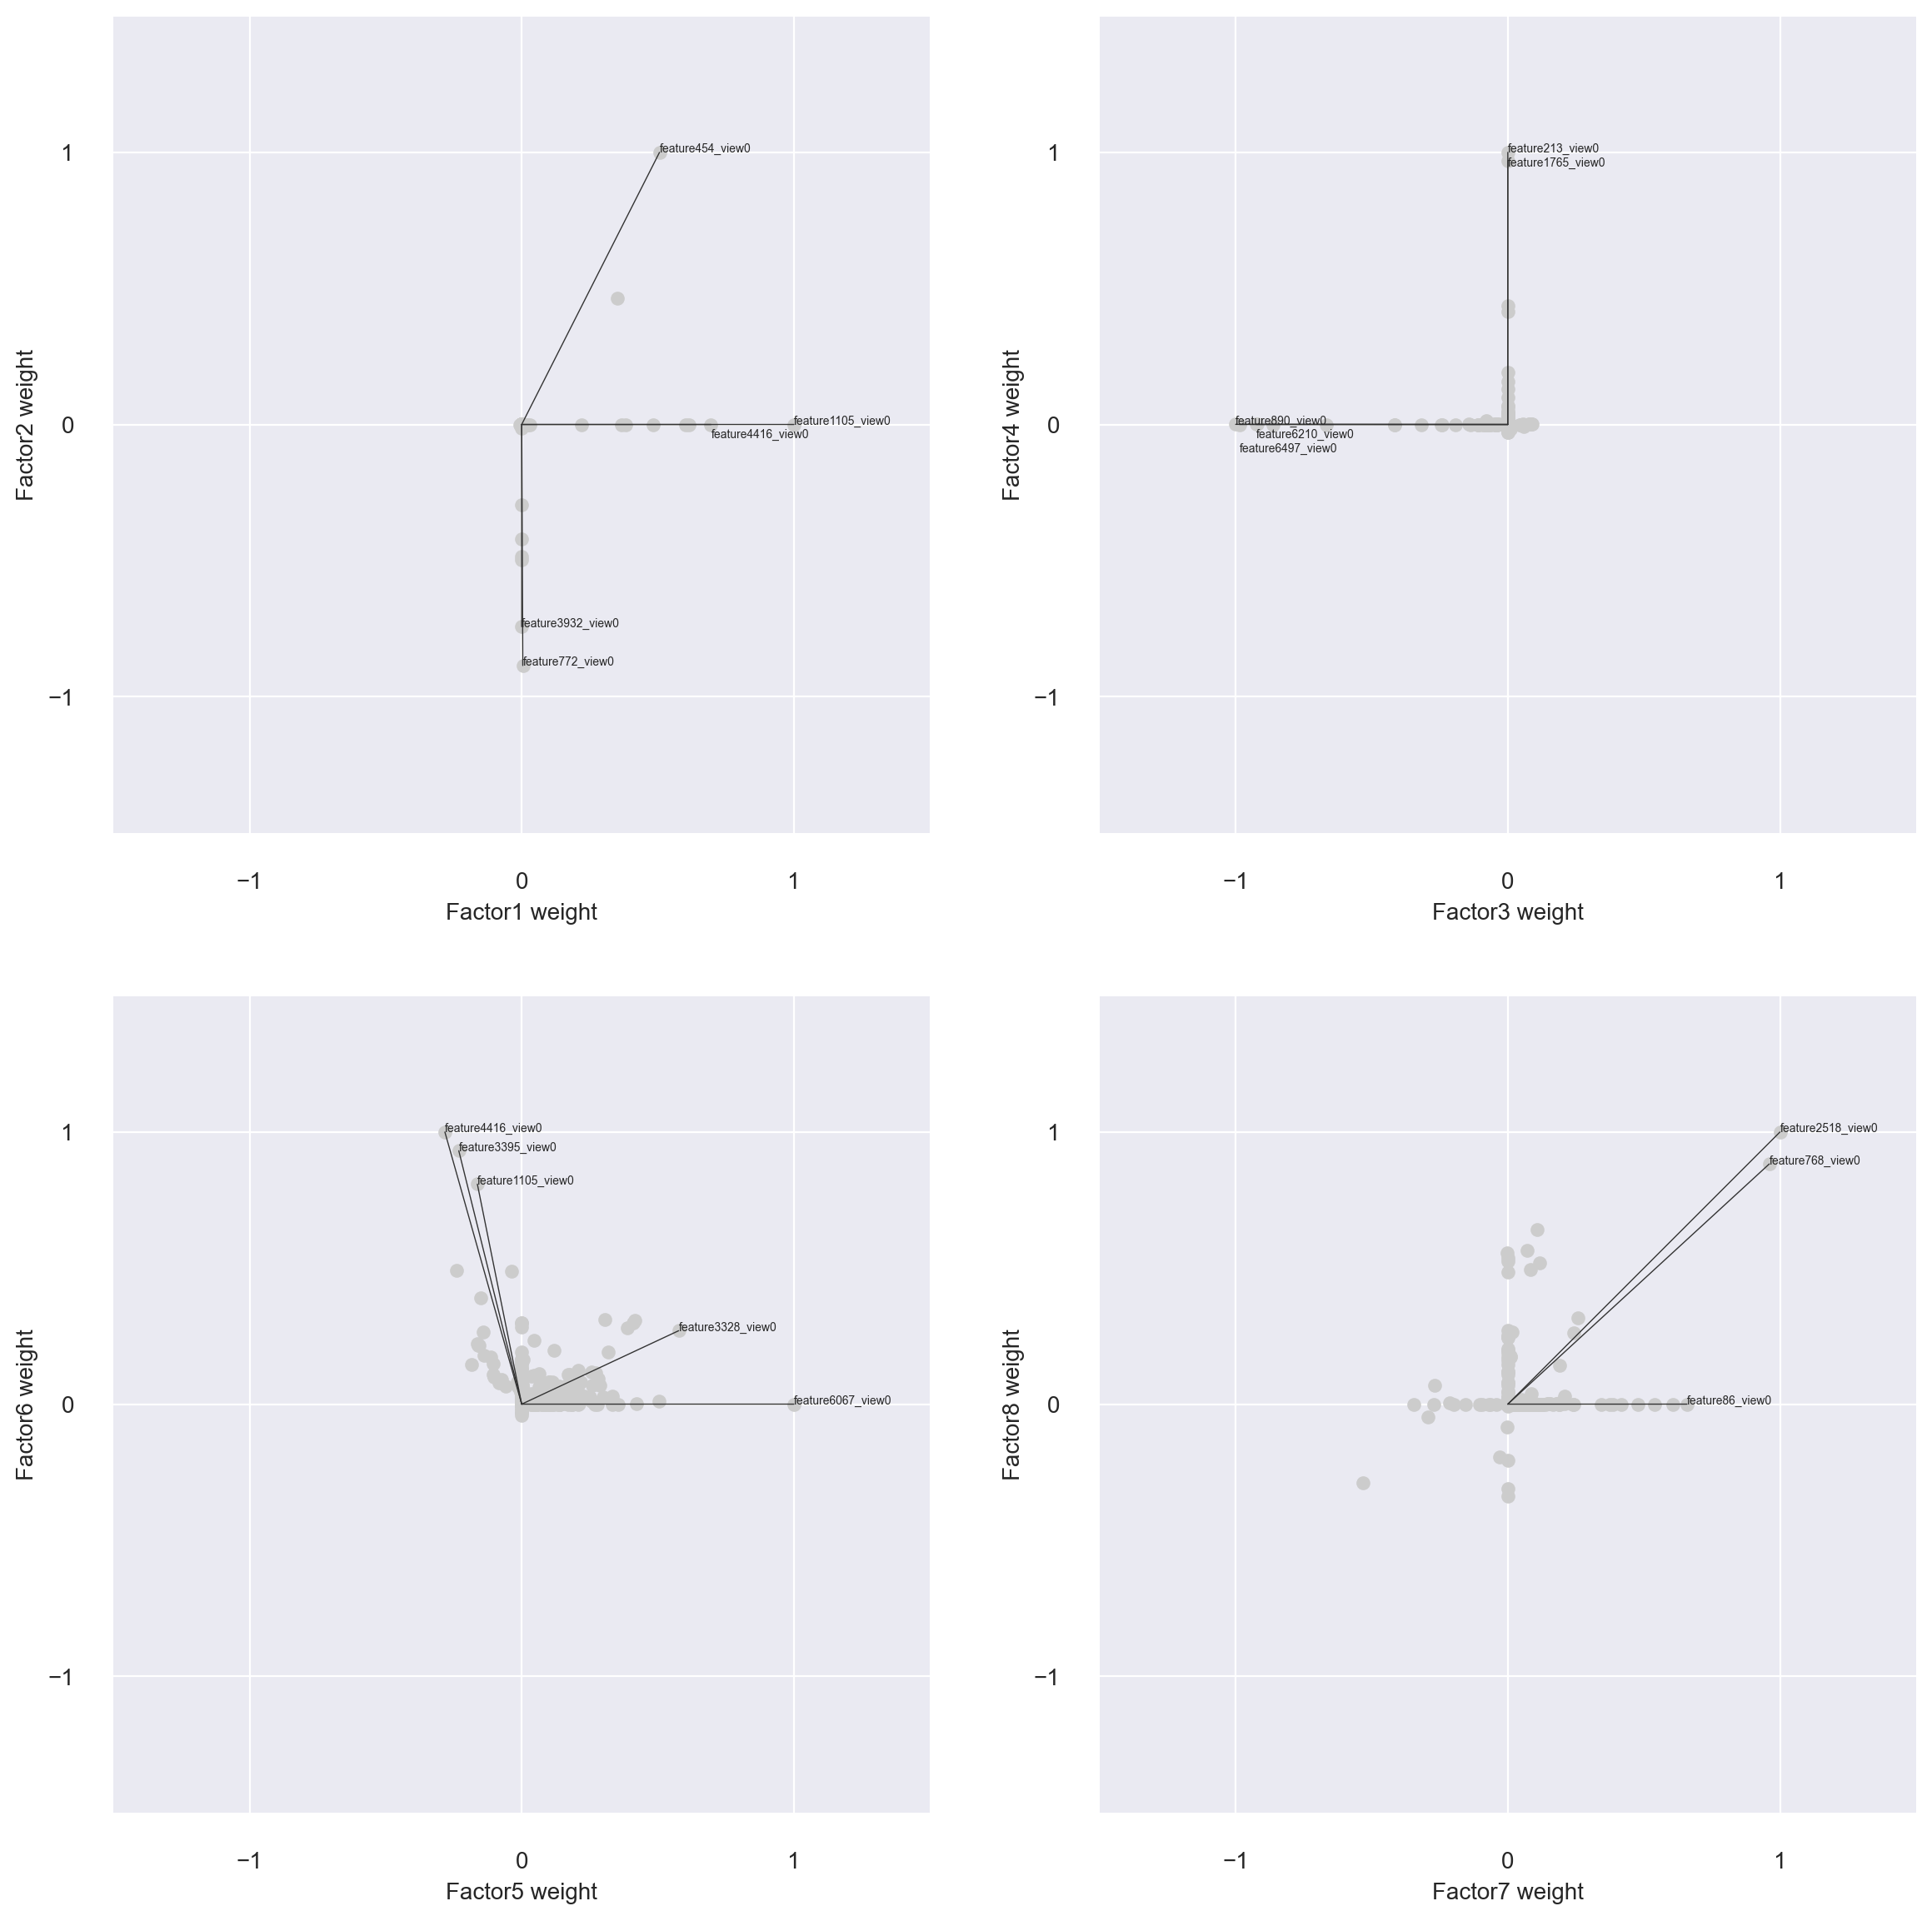

In [7]:
nf = 2
f, axarr = plt.subplots(nf, nf, figsize=(14,14))
fnum = 0
for i in range(nf):
    for j in range(nf):
        mfx.plot_weights_scaled(m, x=fnum, y=fnum+1, n_features=5, ax=axarr[i][j])
        fnum+=2

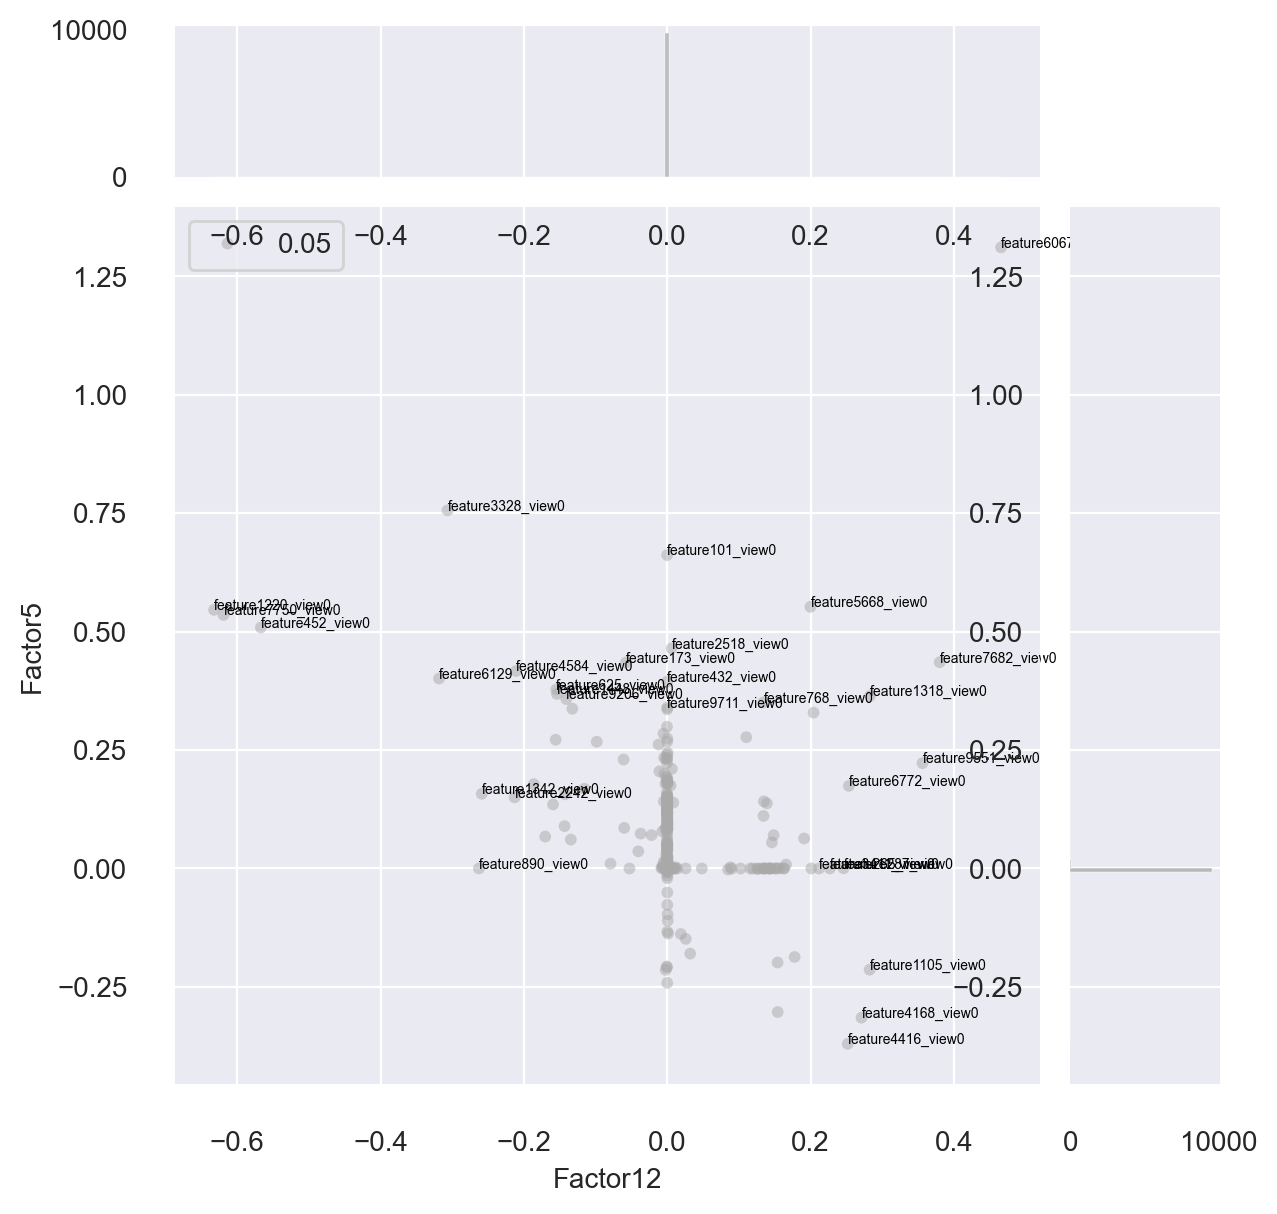

In [8]:
mfx.plot_weights_scatter(m, x="Factor12", y="Factor5",
                         hist=True, n_features=20,
                         size=0.05, linewidth=0, alpha=0.5)

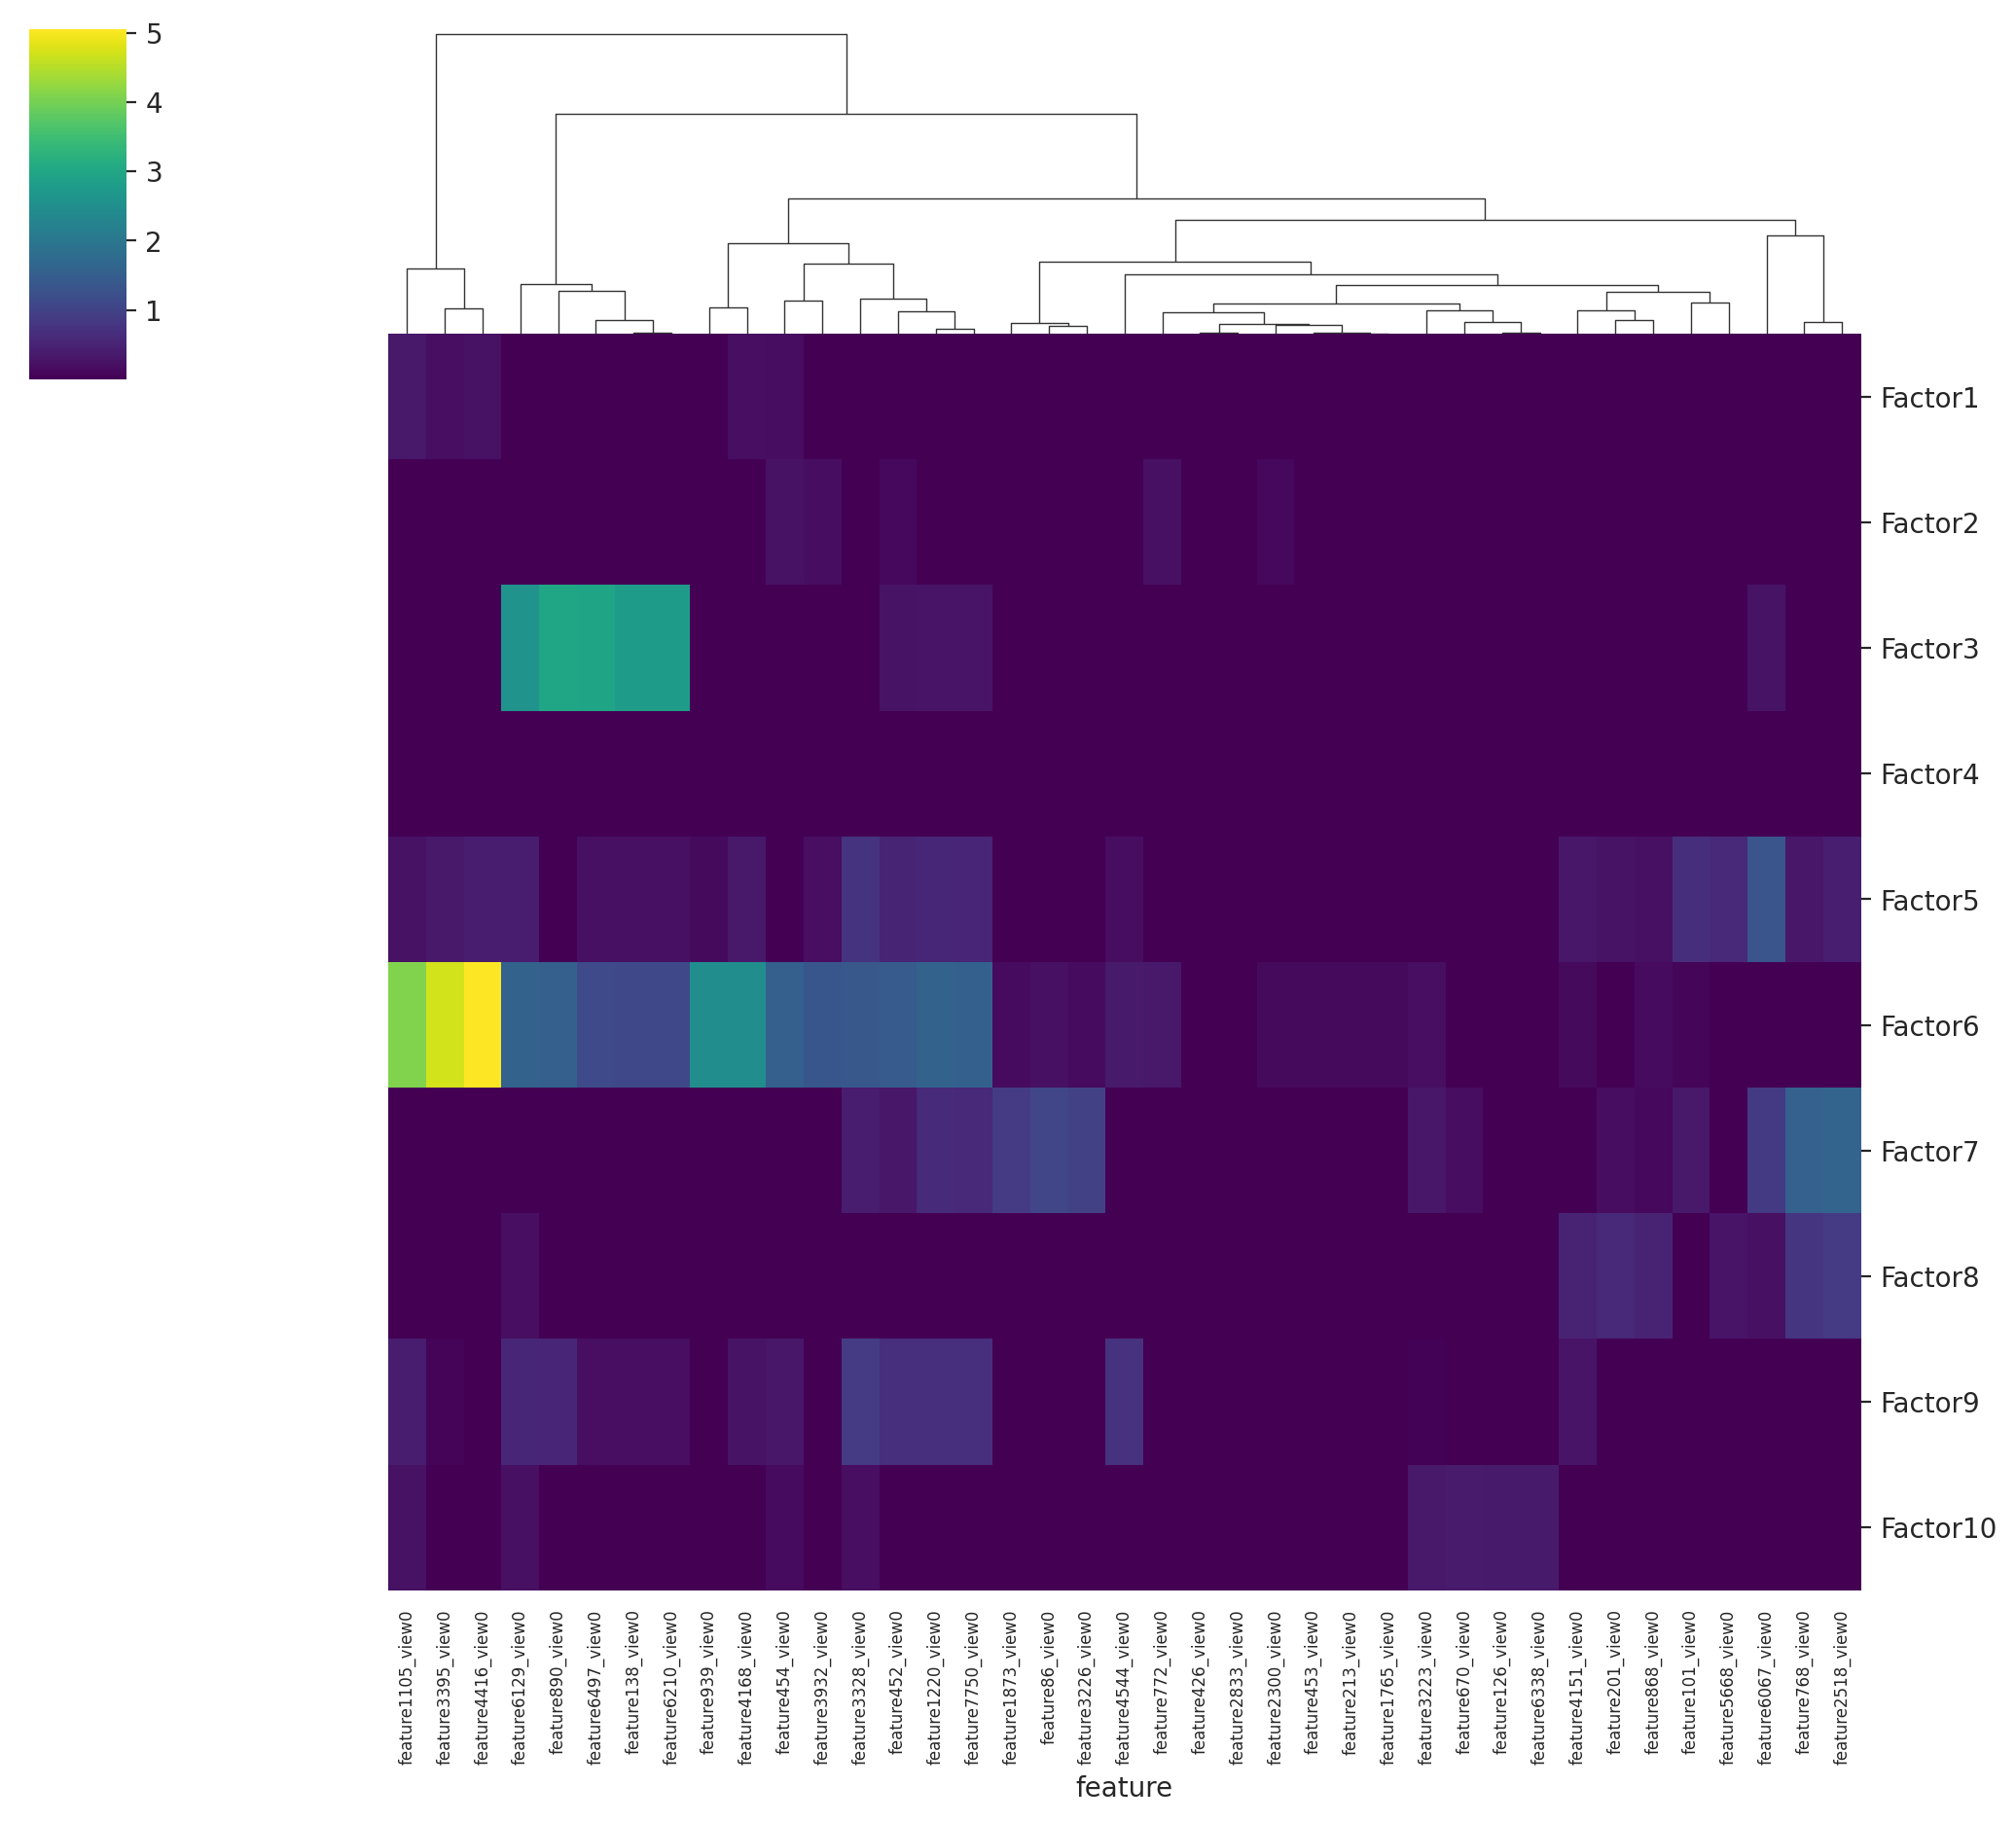

In [13]:
mfx.plot_weights_heatmap(m, n_features=5,
                         factors=range(0, 10),
                         xticklabels_size=6, w_abs=True,
                         cmap="viridis", cluster_factors=False)

<Axes: >

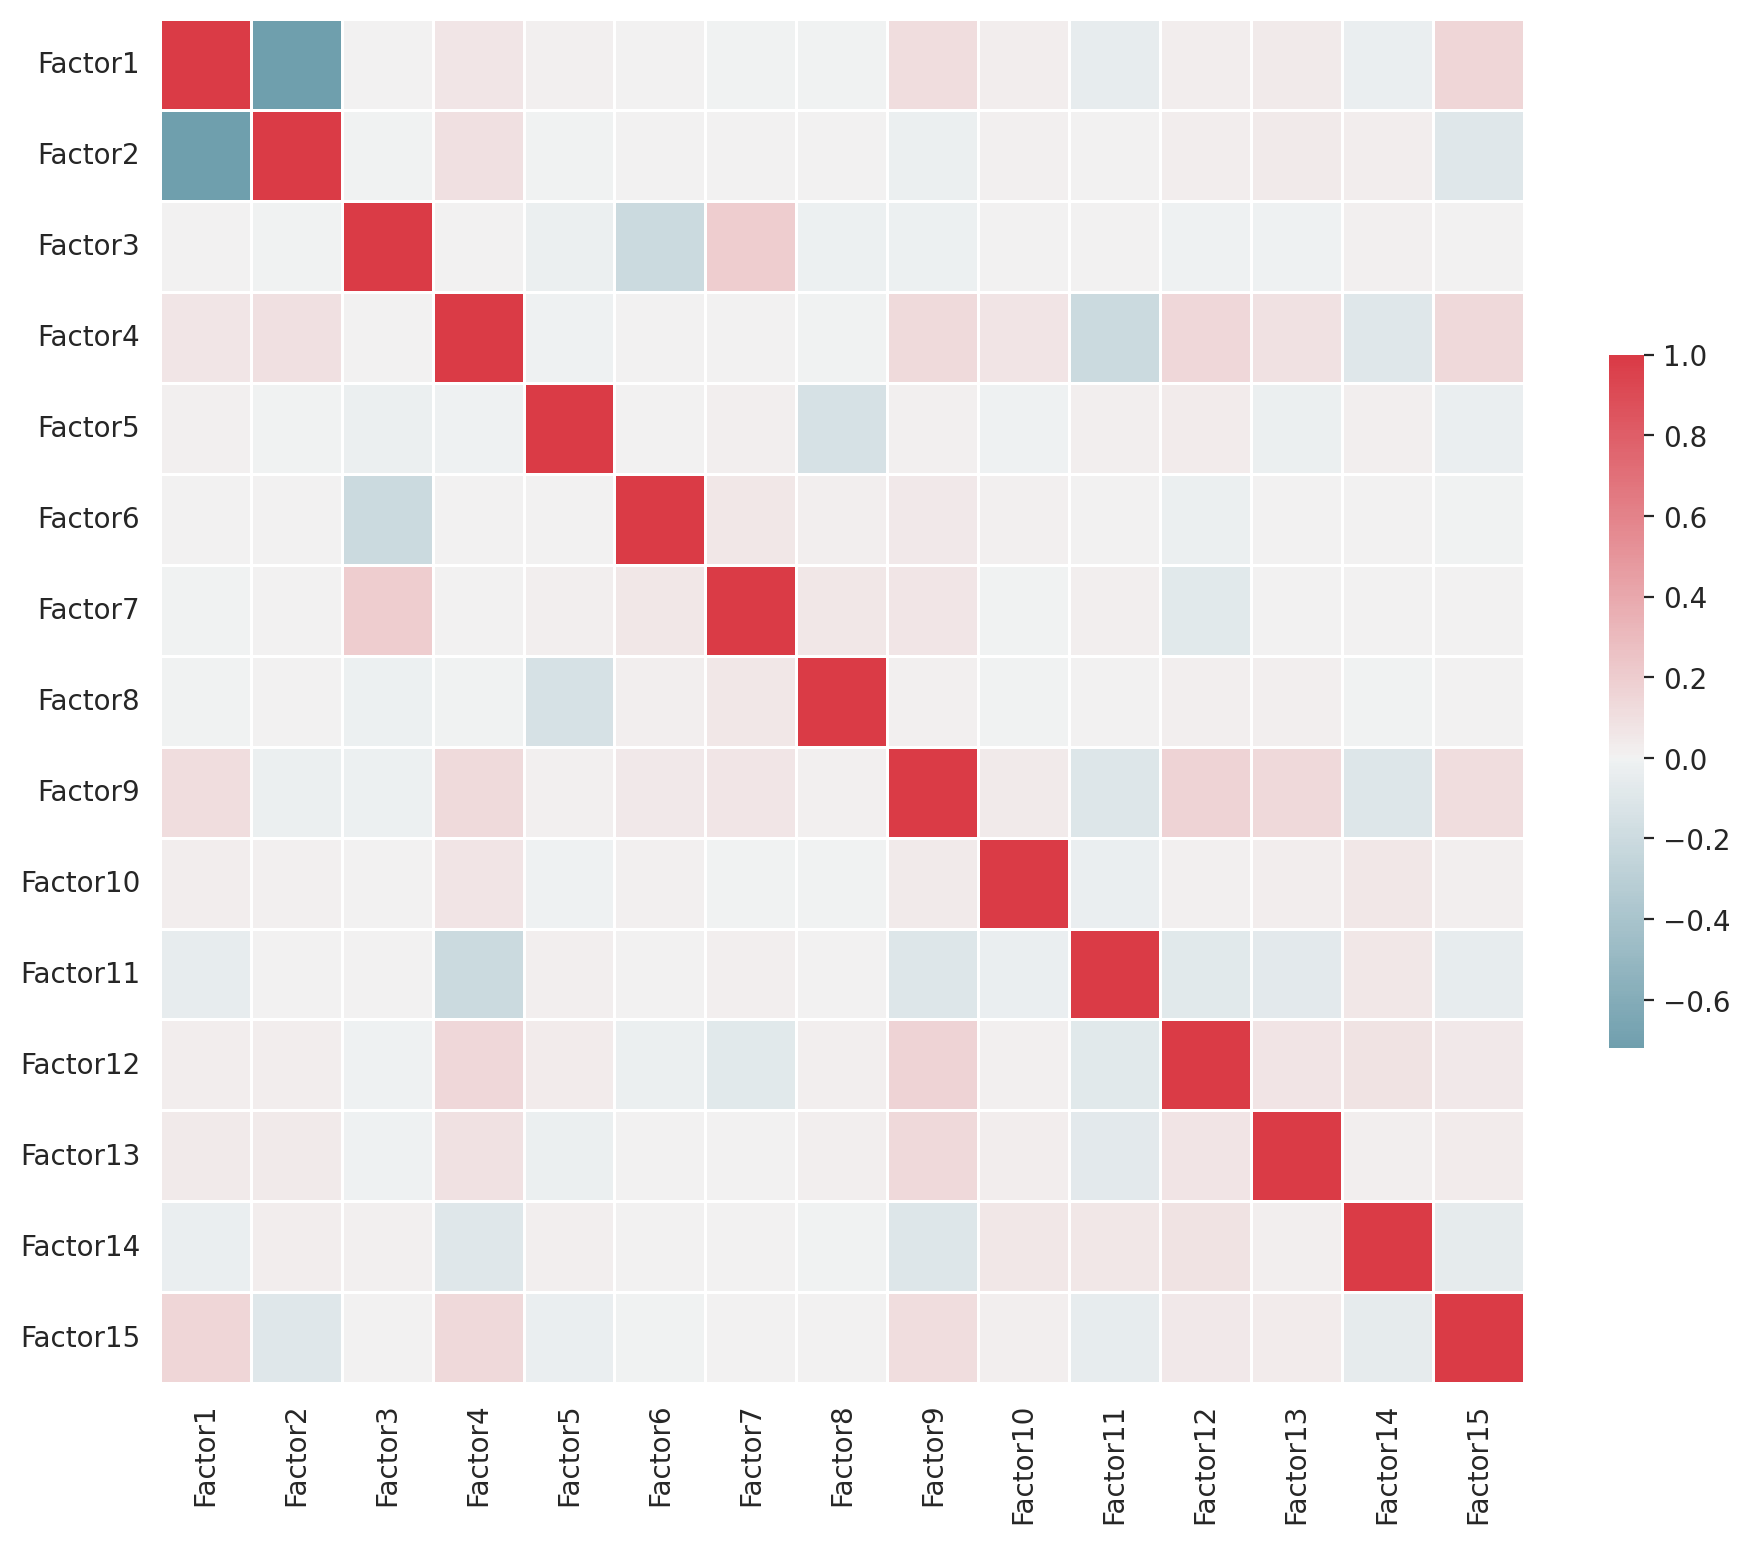

In [14]:
mfx.plot_weights_correlation(m)

<Axes: title={'center': 'Factor4'}, xlabel='Factor1', ylabel='Factor4'>

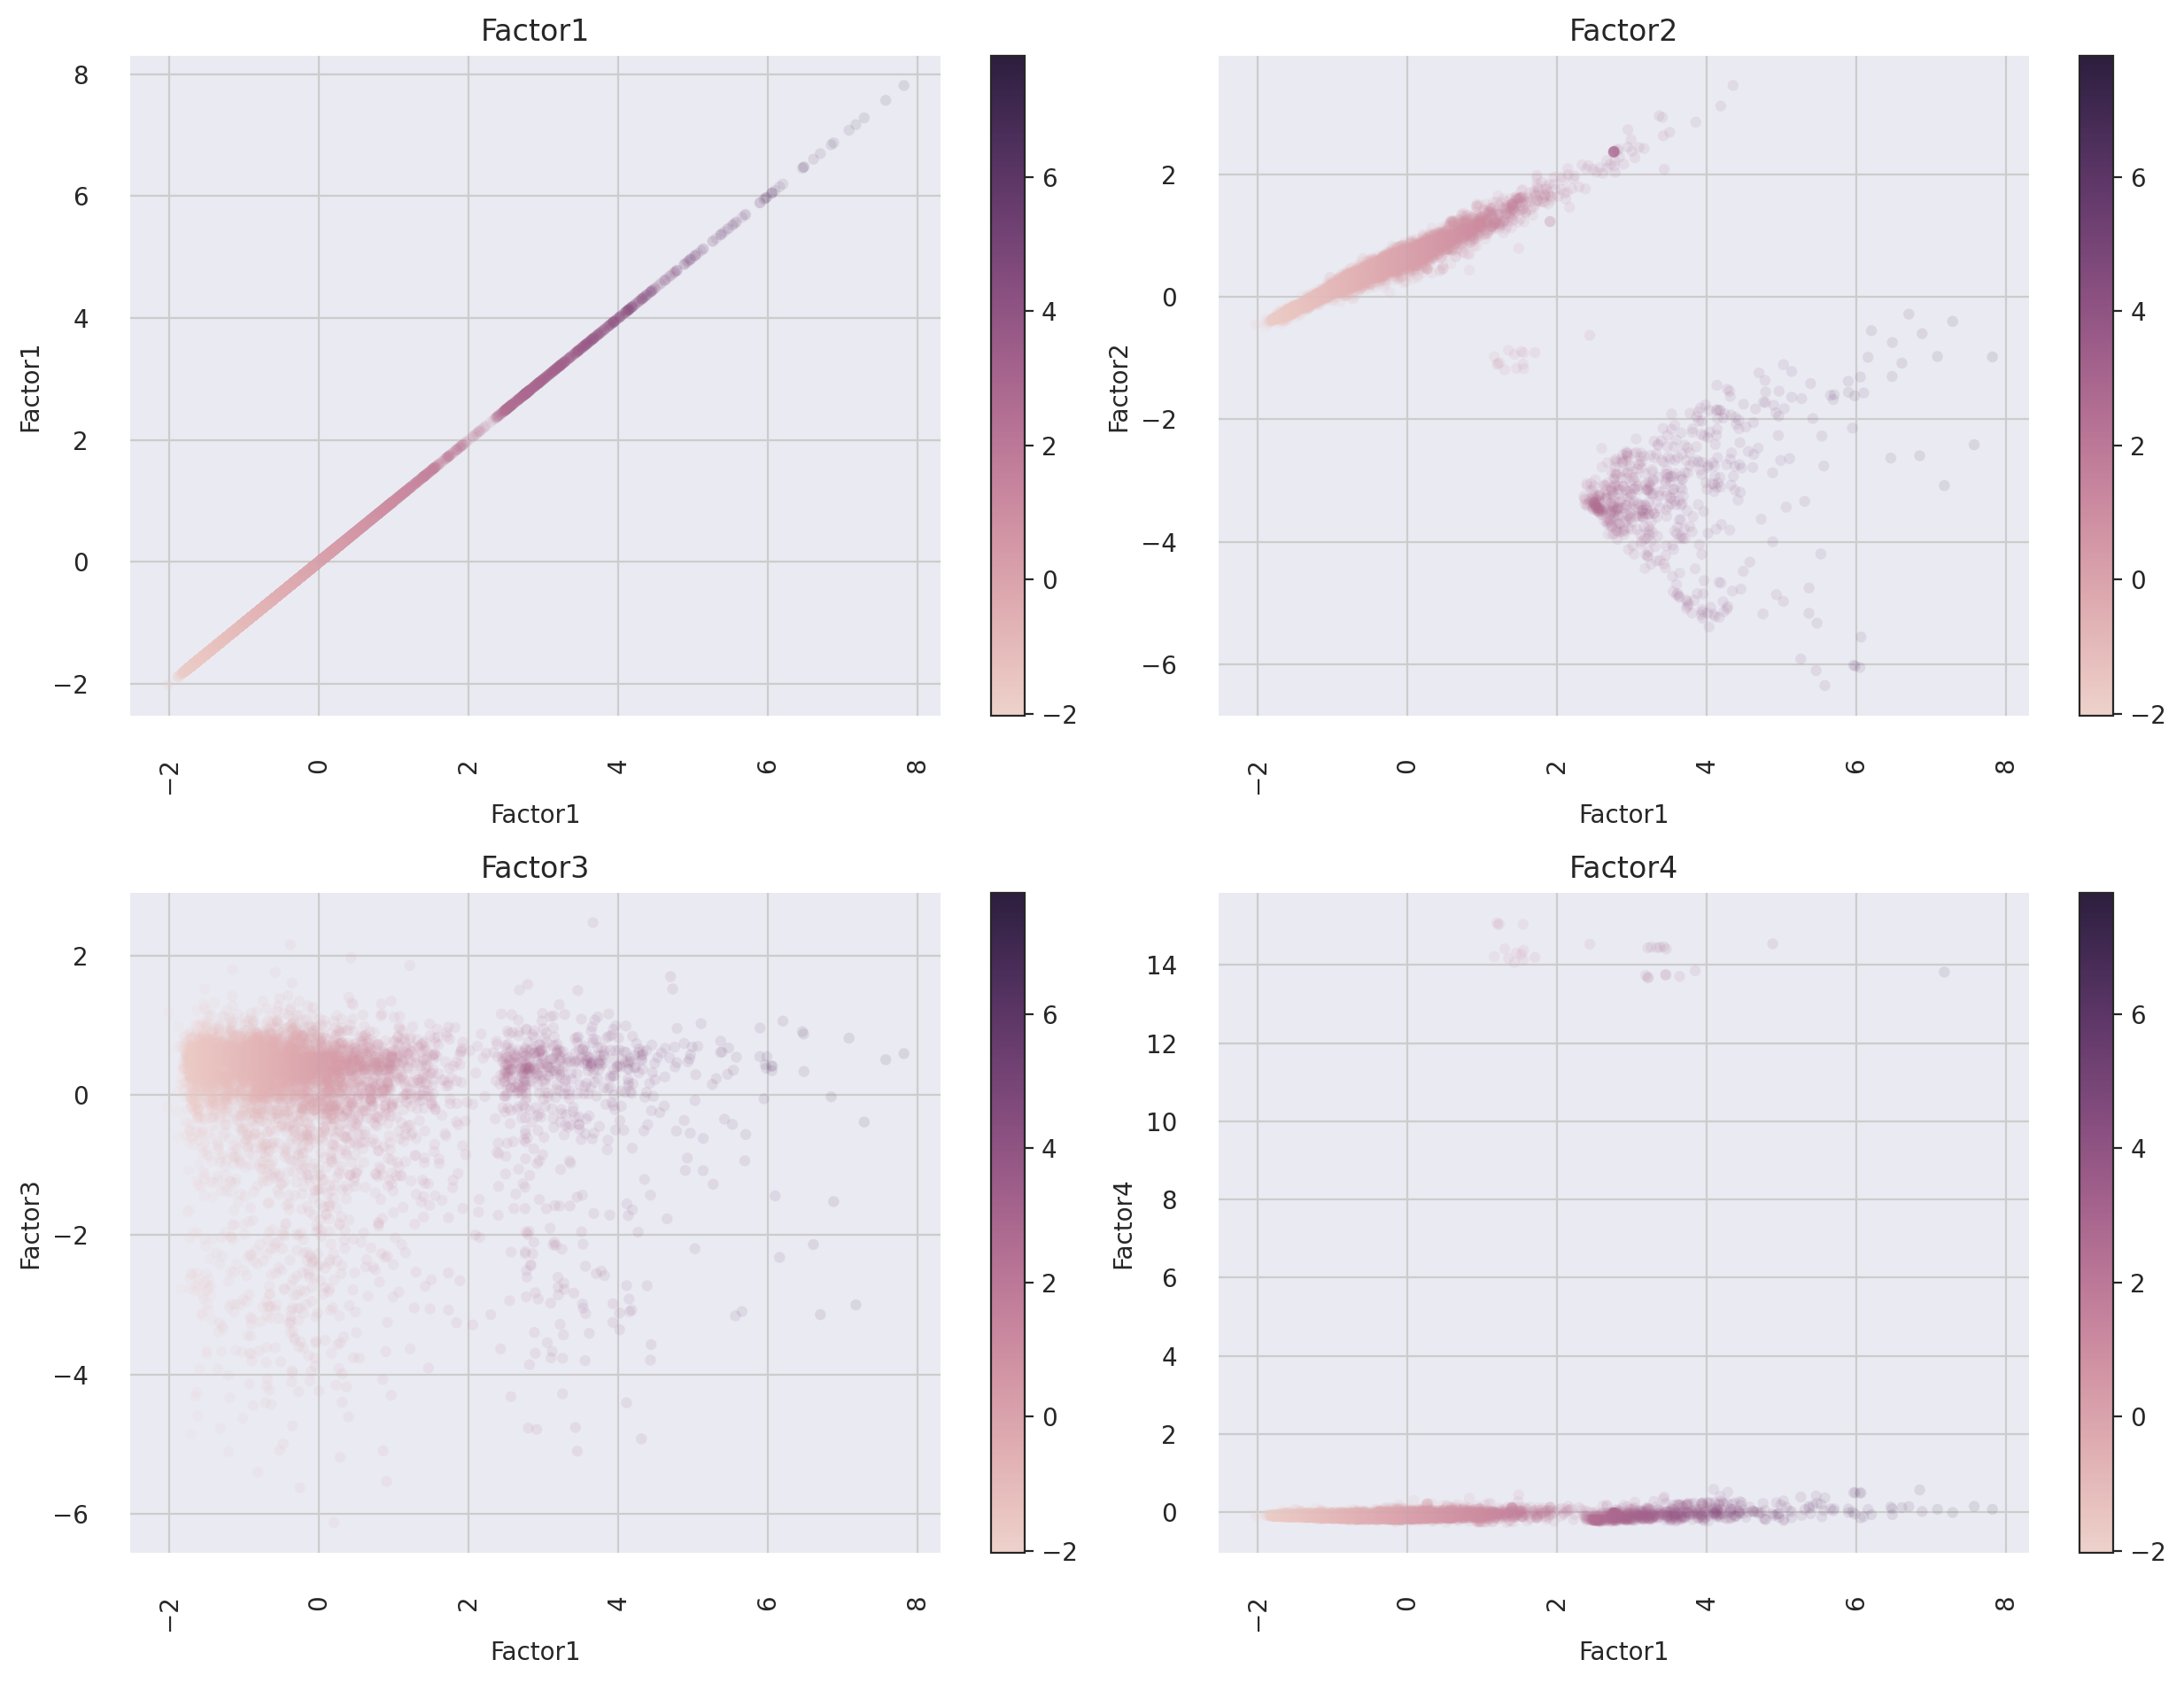

In [21]:
mfx.plot_factors_scatter(
    m,
    x="Factor1", y=range(4), group_label="Factor1", color='Factor1',
    alpha=.1,
    rotate_x_labels=90, ncols=2,
)